In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

In [2]:
from text_recognizer.datasets import EmnistDataset, EmnistLinesDataset, Transpose, construct_image_from_string, get_samples_by_character

In [9]:
emnist_lines = EmnistLinesDataset(train=True,
                                  max_length = 97,
                                  min_overlap = 0.0,
                                  max_overlap = 0.15,
                                  num_samples = 25_000,)

In [10]:
emnist_lines.load_or_generate_data()

2020-12-07 22:39:57.990 | DEBUG    | text_recognizer.datasets.emnist_lines_dataset:_generate_data:157 - Generating data...
2020-12-07 22:40:20.268 | DEBUG    | text_recognizer.datasets.emnist_lines_dataset:_load_data:150 - EmnistLinesDataset loading data from HDF5...


In [11]:
def convert_y_label_to_string(y, emnist_lines=emnist_lines):
    return ''.join([emnist_lines.mapper(i) for i in y])

412 We___________________________________________________________________________________________
new structure that for supporting the basic______________________________________________________
expect a negative association except for the possibility that____________________________________
Federal Share By law this is 70 for the Virgin Islands Guam and Puerto Rico______________________
left I was held up a bit trying to make a left turn By the time Id made it he was gone Traffic___
11 which compares 8 MonKhmer languages with the__________________________________________________
and teachers not to look at each other as white or Negro but as human beings Again_______________
you in a plain straightout shootdown He had lots of friends then as always Even as_______________
the Gallery leaders had__________________________________________________________________________


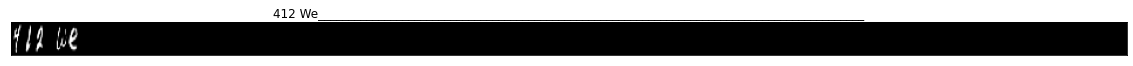

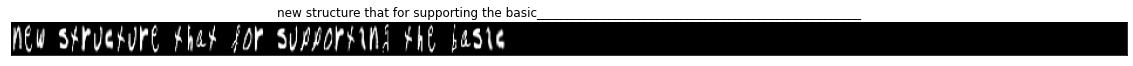

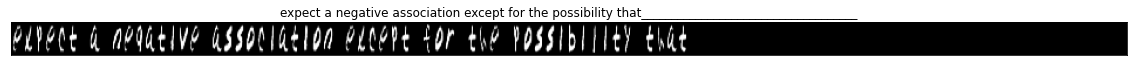

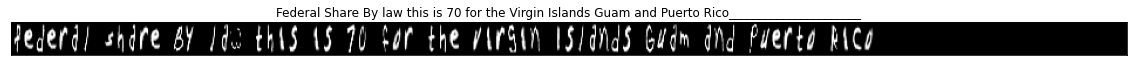

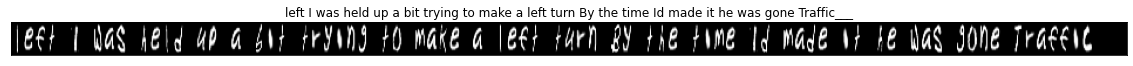

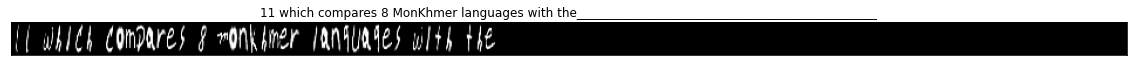

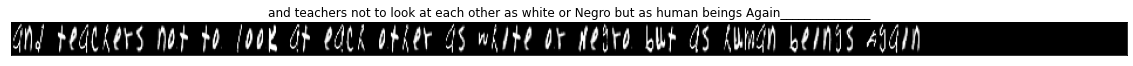

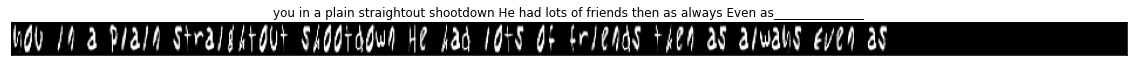

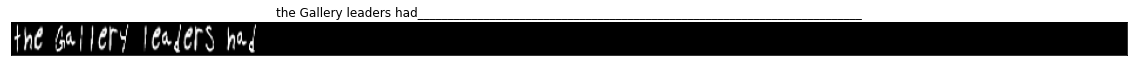

In [12]:


num_samples_to_plot = 9

for i in range(num_samples_to_plot):
    plt.figure(figsize=(20, 20))
    data, target = emnist_lines[i]
    sentence = convert_y_label_to_string(target.numpy()) 
    print(sentence)
    plt.title(sentence)
    plt.imshow(data.squeeze(0), cmap='gray')
    plt.xticks([])
    plt.yticks([])

In [ ]:
print(emnist_lines)